# Data Exploration for the Protein Dataset

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from torchvision.datasets.utils import download_url
from sklearn.preprocessing import StandardScaler

## `Protein` dataset from `SSDKL` paper

In [3]:

def load_dataset_from_ssdkl(path_to_folder):
    X = np.load(os.path.join(path_to_folder, "X.npy"))
    y = np.load(os.path.join(path_to_folder, "y.npy"))

    return X, y

In [4]:
PATH_TO_DATASET = "/home/flo/ssdgm/notebooks/datasets/SSDKL/protein"
X_ssdkl, y_ssdkl = load_dataset_from_ssdkl(PATH_TO_DATASET)
X_ssdkl.shape, y_ssdkl.shape

((45730, 9), (45730,))

## `Protein` dataset from `UCI`

In [5]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv"
DOWNLOAD_FOLDER = "/home/flo/ssdgm/notebooks/datasets/UCI/Protein/raw"

download_url(url=URL, root=DOWNLOAD_FOLDER)

Using downloaded and verified file: /home/flo/ssdgm/notebooks/datasets/UCI/Protein/raw/CASP.csv


In [6]:
df_uci = pd.read_csv("/home/flo/ssdgm/notebooks/datasets/UCI/Protein/raw/CASP.csv")
df_uci.shape

(45730, 10)

In [7]:
df_uci.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [8]:
correlation_matrix = df_uci.corr()
correlation_matrix

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
RMSD,1.000000,-0.015087,0.156895,0.374309,-0.169771,-0.013982,-0.036135,-0.003339,0.000344,0.062830
F1,-0.015087,1.000000,0.906606,0.126285,0.931056,0.998185,0.967531,0.554002,0.651251,-0.898240
F2,0.156895,0.906606,1.000000,0.502562,0.793143,0.902853,0.908354,0.515929,0.584242,-0.786188
F3,0.374309,0.126285,0.502562,1.000000,0.031230,0.122622,0.200650,0.080064,0.095340,-0.069039
F4,-0.169771,0.931056,0.793143,0.031230,1.000000,0.925707,0.938108,0.485185,0.676919,-0.891766
F5,-0.013982,0.998185,0.902853,0.122622,0.925707,1.000000,0.961769,0.553729,0.642961,-0.897765
F6,-0.036135,0.967531,0.908354,0.200650,0.938108,0.961769,1.000000,0.538198,0.662584,-0.881973
F7,-0.003339,0.554002,0.515929,0.080064,0.485185,0.553729,0.538198,1.000000,0.347030,-0.521148
F8,0.000344,0.651251,0.584242,0.095340,0.676919,0.642961,0.662584,0.347030,1.000000,-0.637287
F9,0.062830,-0.898240,-0.786188,-0.069039,-0.891766,-0.897765,-0.881973,-0.521148,-0.637287,1.000000


In [9]:

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

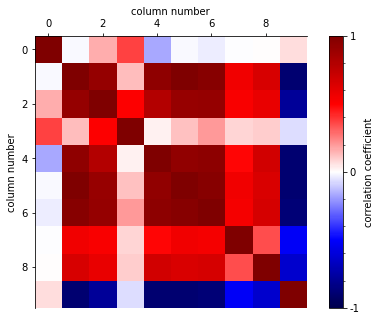

In [10]:

width = 390
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1.5))
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xlabel("column number")
ax.set_ylabel("column number")
pos = ax.imshow(correlation_matrix, interpolation='nearest', interpolation_stage='data', cmap='seismic')
pos.set_clim([-1, 1])
cbar = fig.colorbar(pos, ax=ax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(labels=["-1", "0", "1"])
cbar.ax.set_ylabel("correlation coefficient")
cbar.minorticks_on()

In [16]:
# the independent variables set
X = df_uci.iloc[:, 1:]
print(X.shape)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(np.mean(vif_data["VIF"]))

(45730, 9)
609.6494393066303


In [17]:
vif_data["VIF"].value_counts()

2793.393763    1
168.999278     1
119.359750     1
62.756775      1
2124.420812    1
136.224276     1
7.272833       1
4.839727       1
69.577738      1
Name: VIF, dtype: int64

In [14]:
np.linalg.cond(X)

52818226.455222994

In [18]:
for i in range(5, 100, 5):
    print(f"{i}: ", np.sum(vif_data["VIF"] > i))

5:  8
10:  7
15:  7
20:  7
25:  7
30:  7
35:  7
40:  7
45:  7
50:  7
55:  7
60:  7
65:  6
70:  5
75:  5
80:  5
85:  5
90:  5
95:  5


In [20]:
np.linalg.cond(X)

52818226.455212794

array([[<AxesSubplot:xlabel='RMSD', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F1', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F2', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F3', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F4', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F5', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F6', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F7', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F8', ylabel='RMSD'>,
        <AxesSubplot:xlabel='F9', ylabel='RMSD'>],
       [<AxesSubplot:xlabel='RMSD', ylabel='F1'>,
        <AxesSubplot:xlabel='F1', ylabel='F1'>,
        <AxesSubplot:xlabel='F2', ylabel='F1'>,
        <AxesSubplot:xlabel='F3', ylabel='F1'>,
        <AxesSubplot:xlabel='F4', ylabel='F1'>,
        <AxesSubplot:xlabel='F5', ylabel='F1'>,
        <AxesSubplot:xlabel='F6', ylabel='F1'>,
        <AxesSubplot:xlabel='F7', ylabel='F1'>,
        <AxesSubplot:xlabel='F8', ylabel='F1'>,
        <AxesSubplot:xlabel='F9', ylabel='F1'>],
       [<AxesS

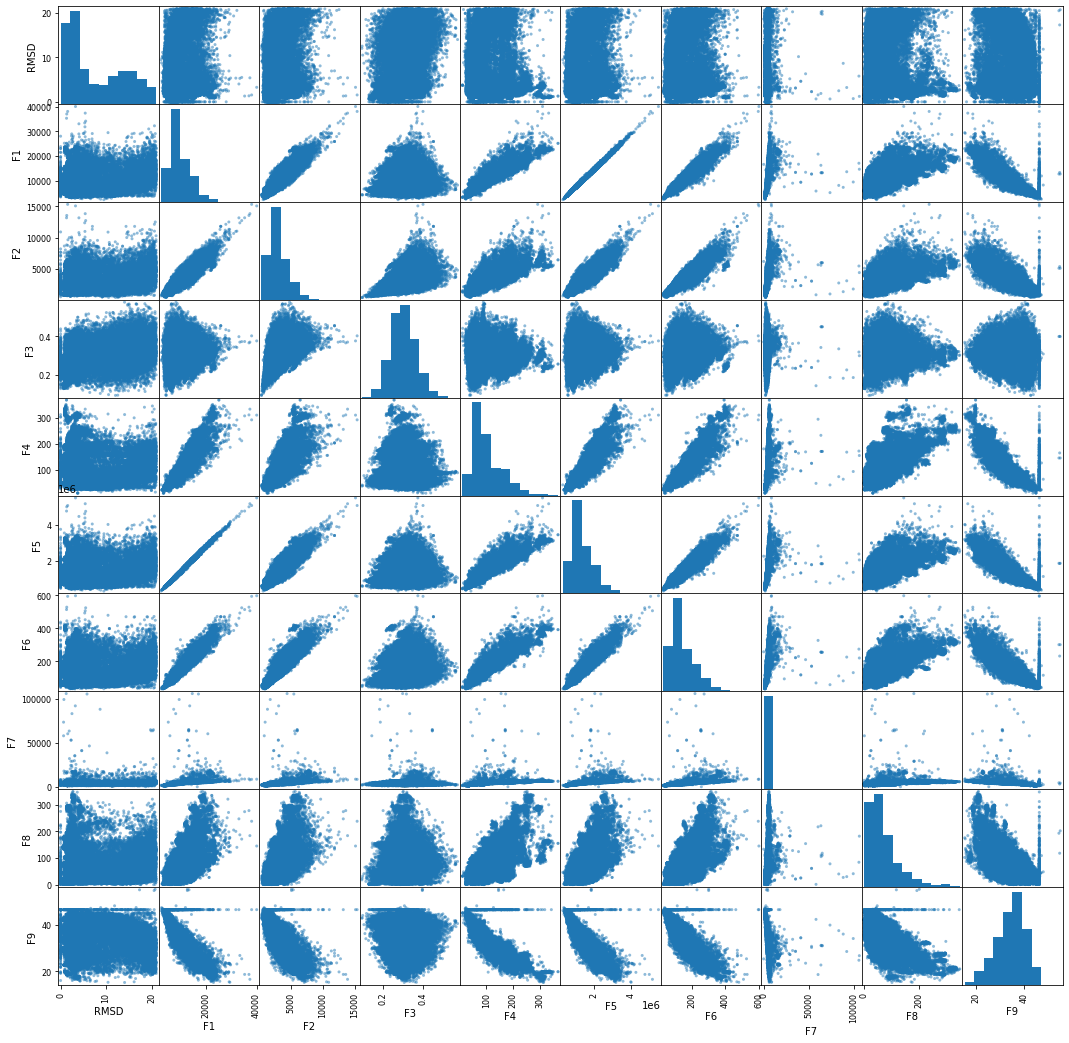

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize=(18, 18))

## Conclusion

- use `RMSD` as target
- no cleaning steps necessary